In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings 
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("concrete_data.csv")
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.shape

(1030, 9)

In [4]:
data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [5]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
x=data.drop(columns=['concrete_compressive_strength'])
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


In [8]:
y_train.head()

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
Name: concrete_compressive_strength, dtype: float64

In [9]:
lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.627553179231485

In [10]:
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662866

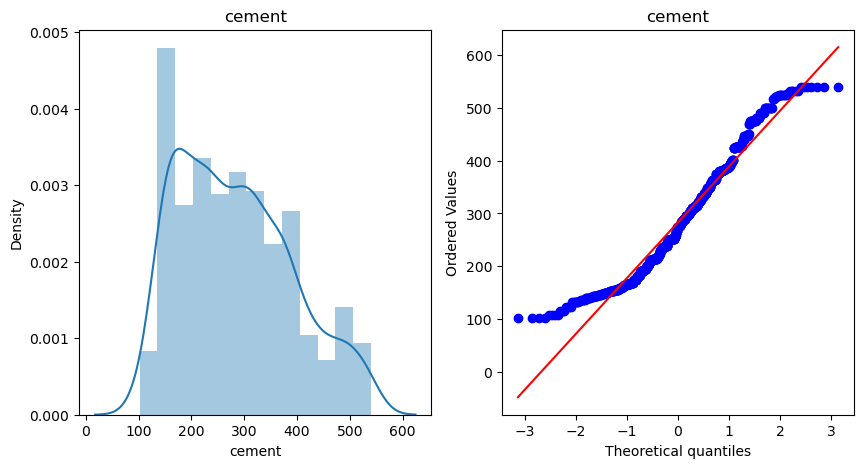

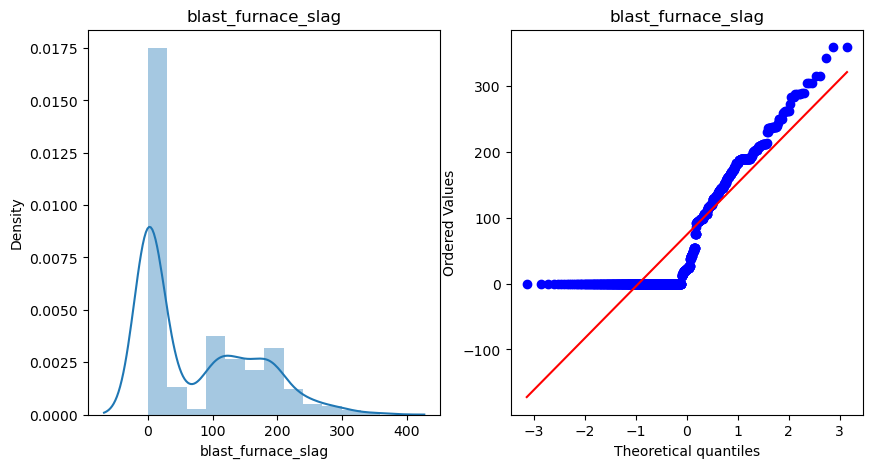

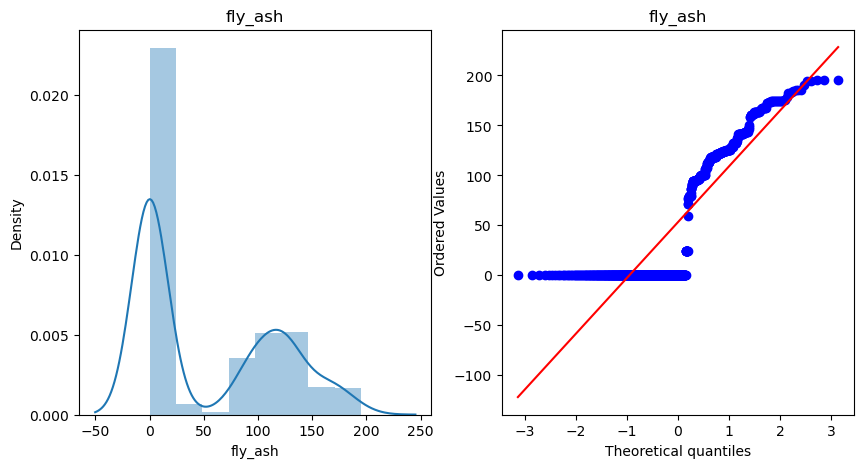

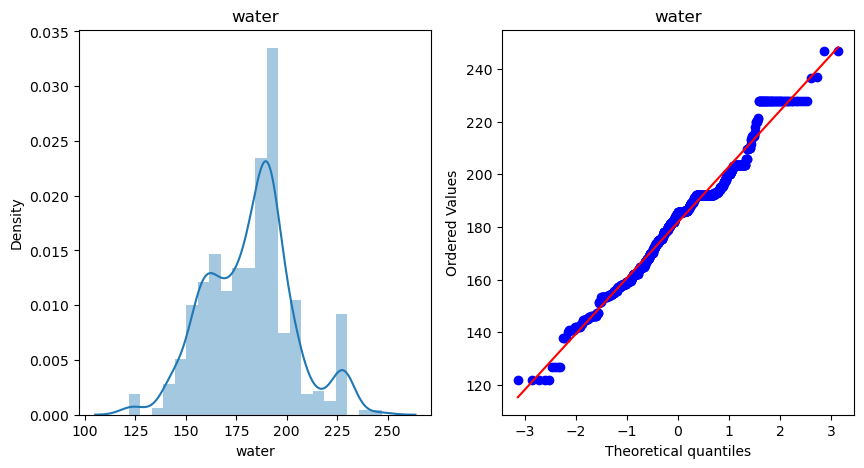

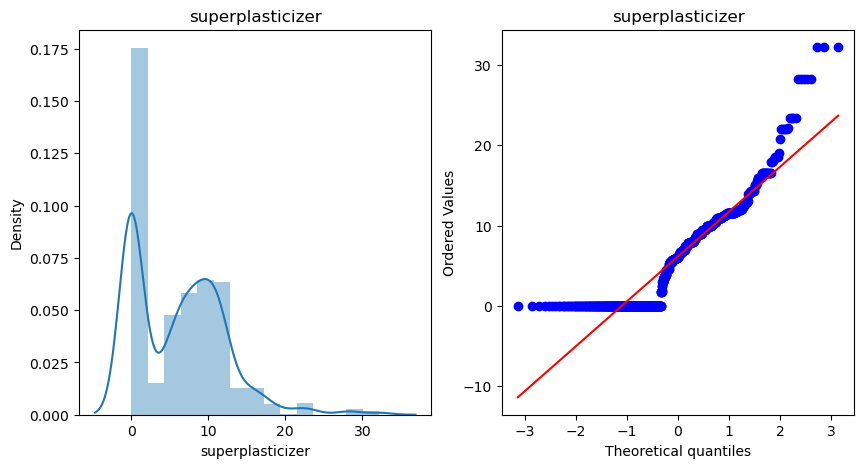

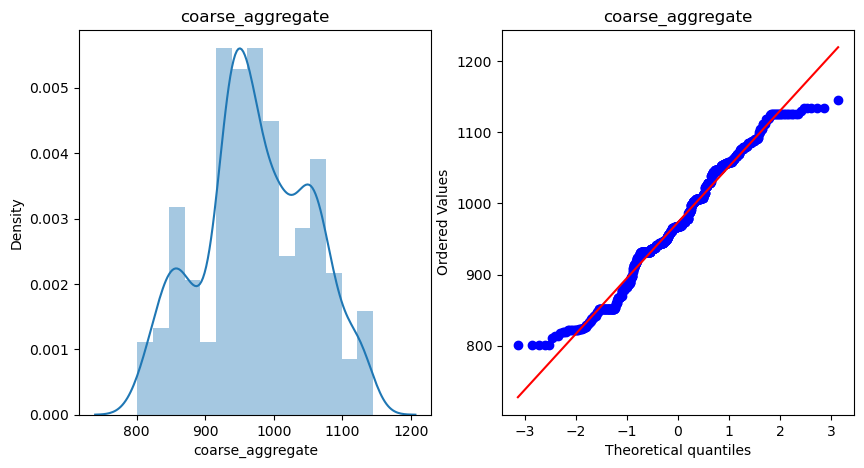

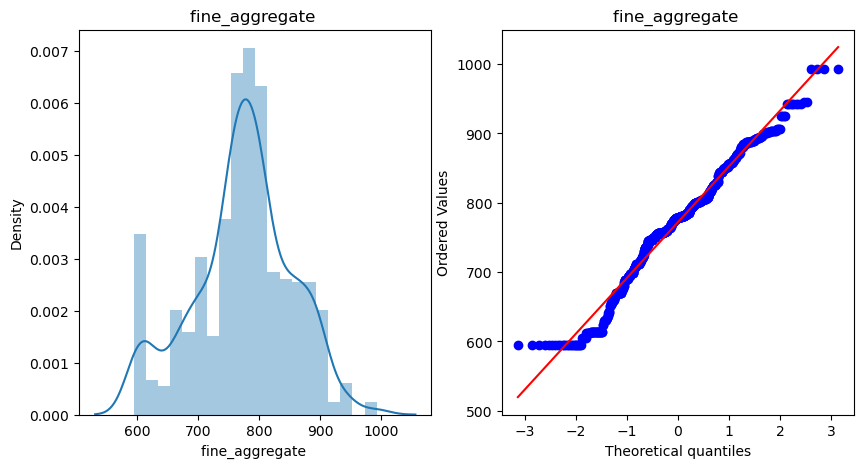

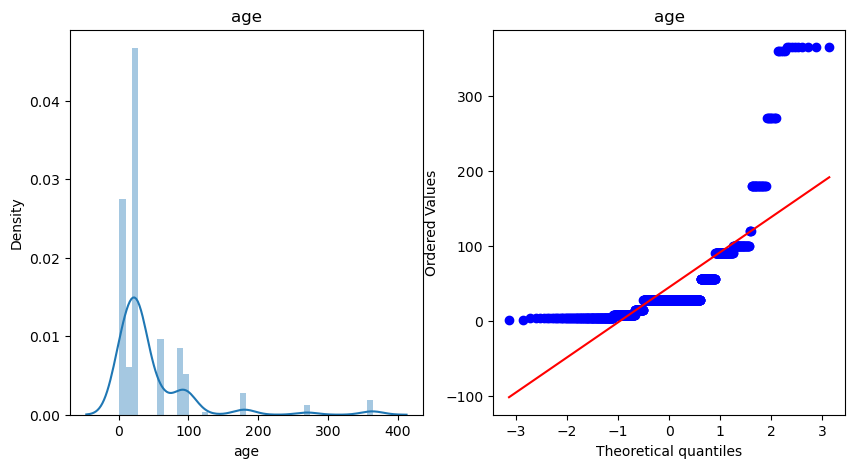

In [11]:
for col in x_train.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [12]:
pt=PowerTransformer()
x_train_transformed=pt.fit_transform(x_train+0.00001)
x_test_transformed=pt.transform(x_test+0.00001)
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,cement,0.174348
1,blast_furnace_slag,0.015715
2,fly_ash,-0.161447
3,water,0.771307
4,superplasticizer,0.253934
5,coarse_aggregate,1.130050
6,fine_aggregate,1.783100
7,age,0.019885


In [13]:
lr.fit(x_train_transformed,y_train)
y_pred_2=lr.predict(x_test_transformed)
r2_score(y_test,y_pred_2)

0.8161906747993164

In [14]:
pt=PowerTransformer(method='box-cox')
x_transformed_2=pt.fit_transform(x+0.0000001)

np.mean(cross_val_score(lr,x_transformed_2,y,scoring='r2'))

0.6658537942219862

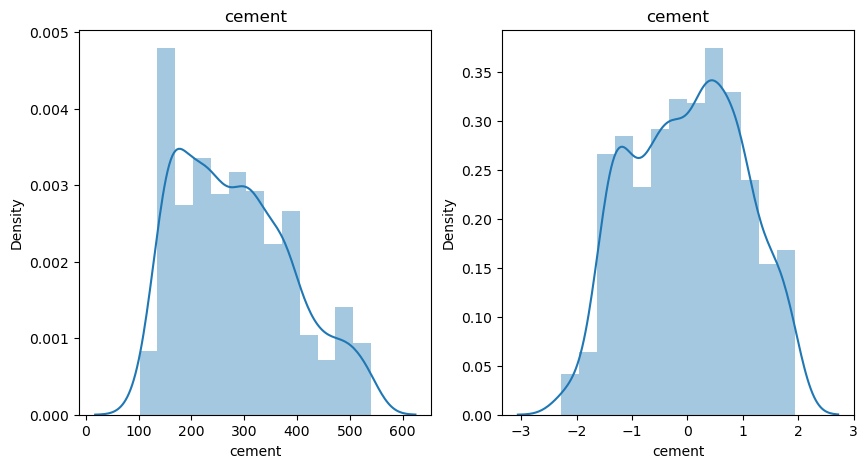

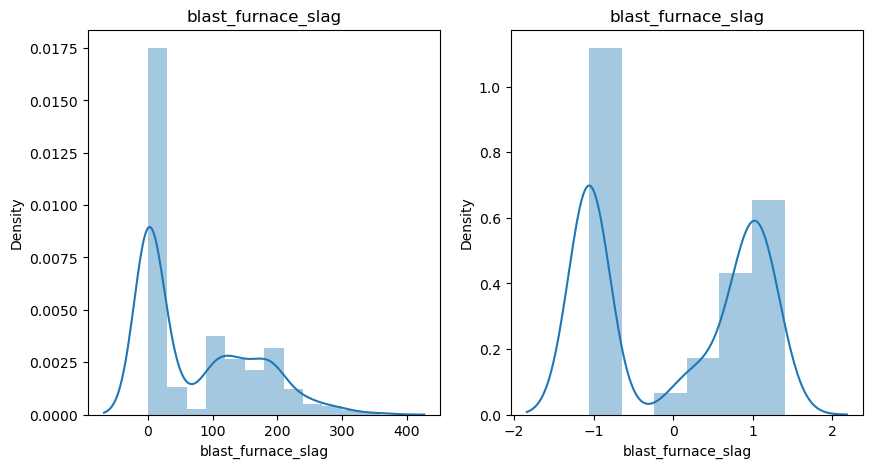

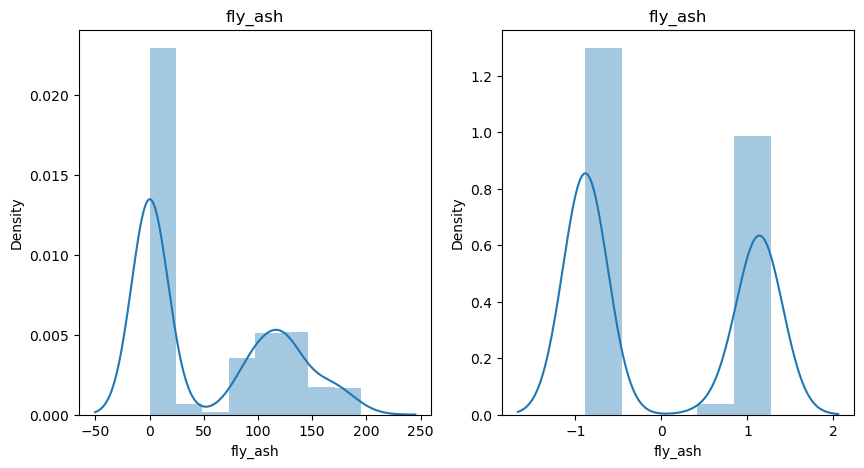

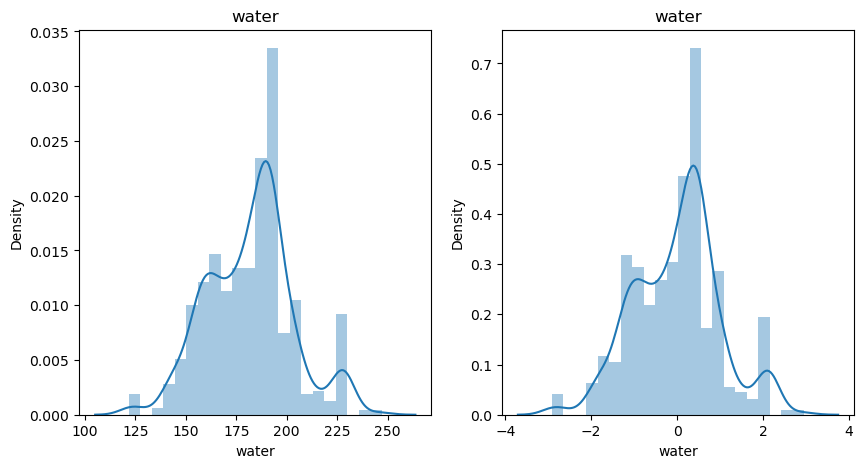

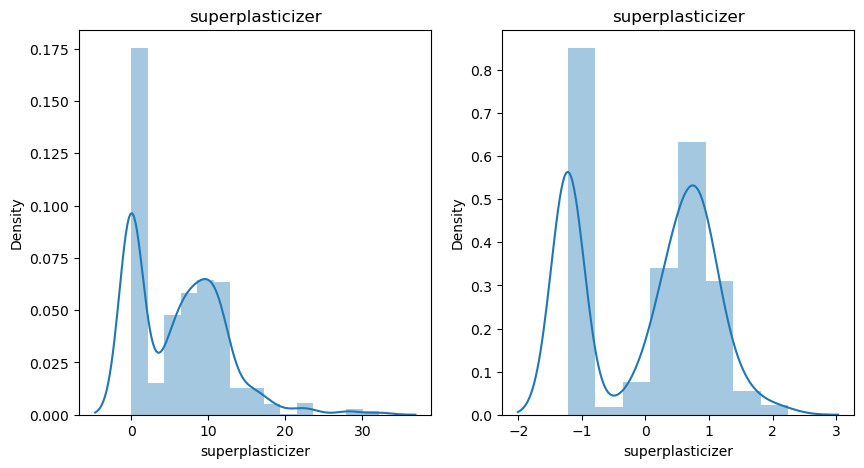

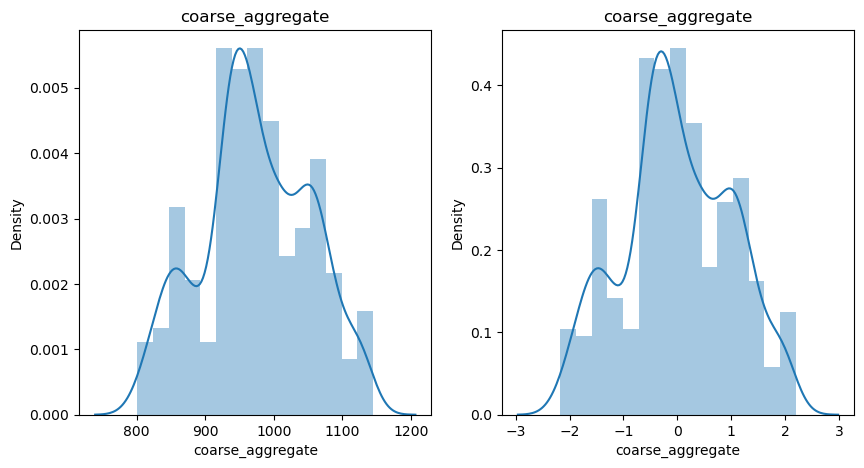

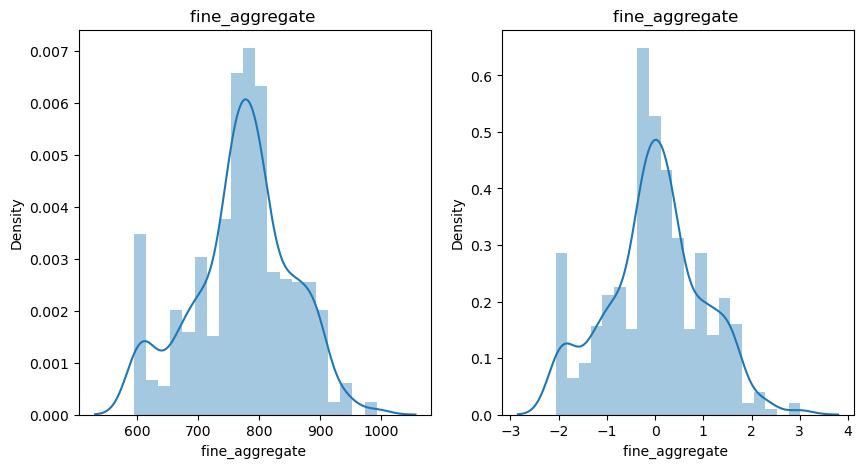

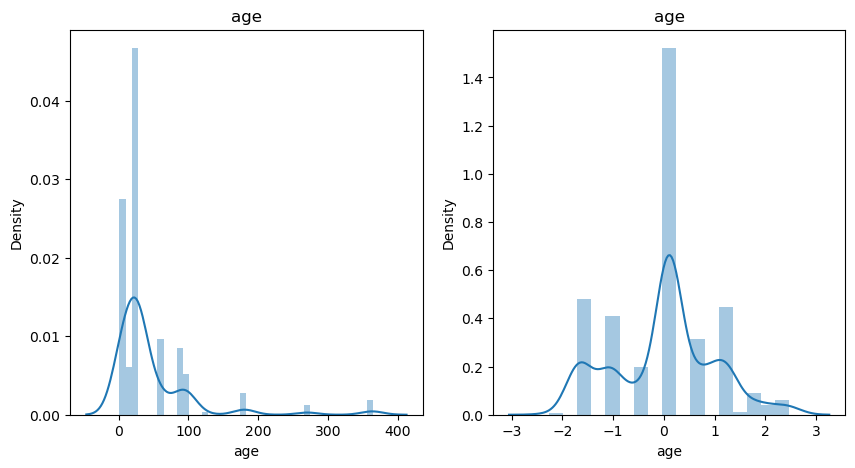

In [15]:
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)
for col in x_train_transformed.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col)
    plt.show()

In [21]:
# Apply Yeo-Johnson Transform
pt3=PowerTransformer()
x_train_transformed_3=pt3.fit_transform(x_train)
x_test_transformed_3=pt3.transform(x_test)

lr.fit(x_train_transformed_3,y_train)
y_predict_3=lr.predict(x_test_transformed_3)
print(r2_score(y_test,y_predict_3))
pd.DataFrame({'cols':x_train.columns,'Yea_Johnson_lambdas':pt3.lambdas_})

0.8161906513339305


,cols,Yea_Johnson_lambdas
0,cement,0.174348
1,blast_furnace_slag,0.015715
2,fly_ash,-0.161447
3,water,0.771307
4,superplasticizer,0.253935
5,coarse_aggregate,1.130050
6,fine_aggregate,1.783100
7,age,0.019885


In [18]:
pt1=PowerTransformer()
x_transformed_3=pt1.fit_transform(x)

np.mean(cross_val_score(lr,x_transformed_3,y,scoring='r2'))

0.6834625134285743

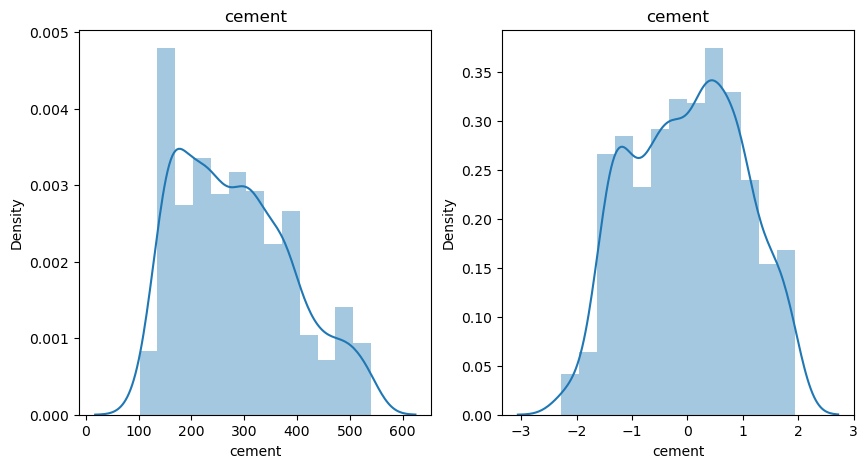

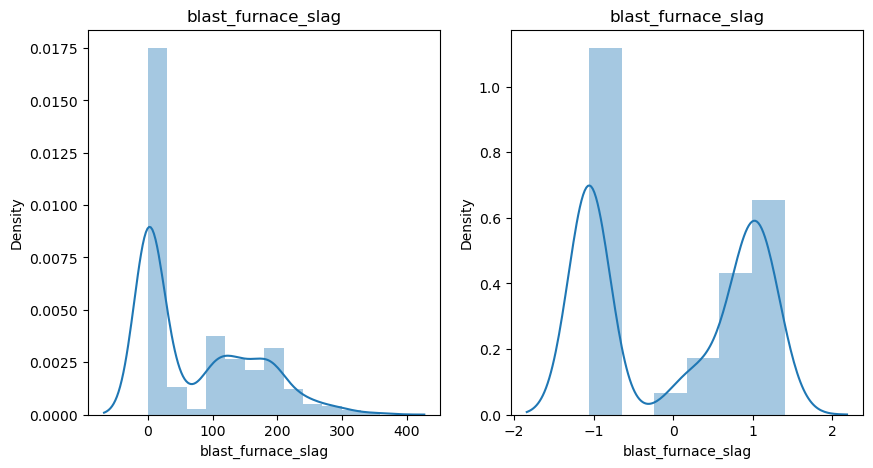

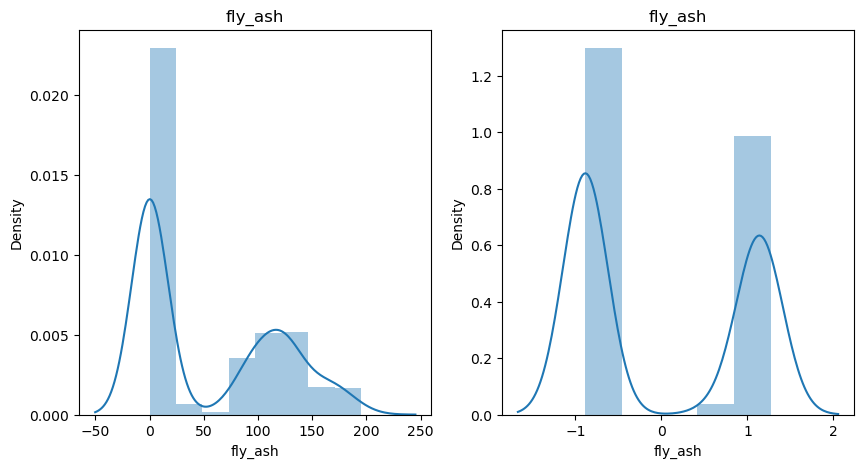

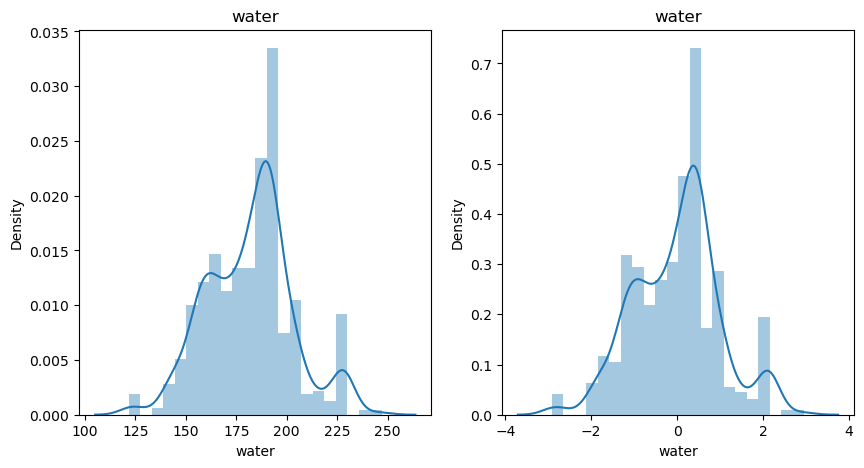

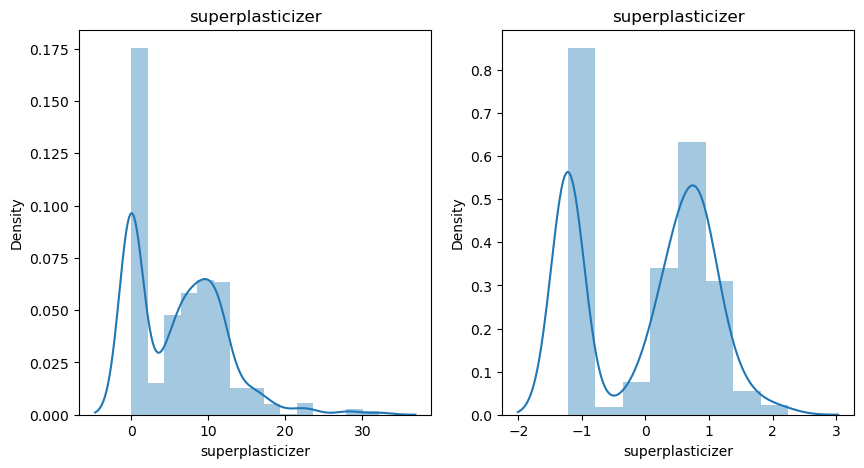

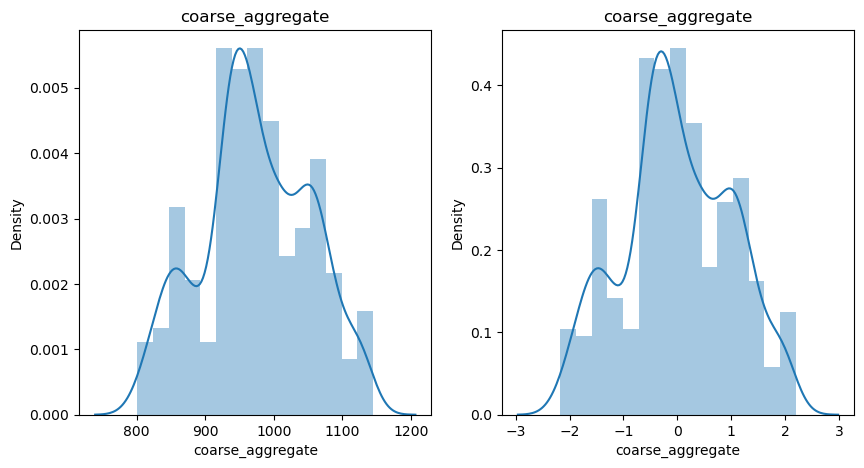

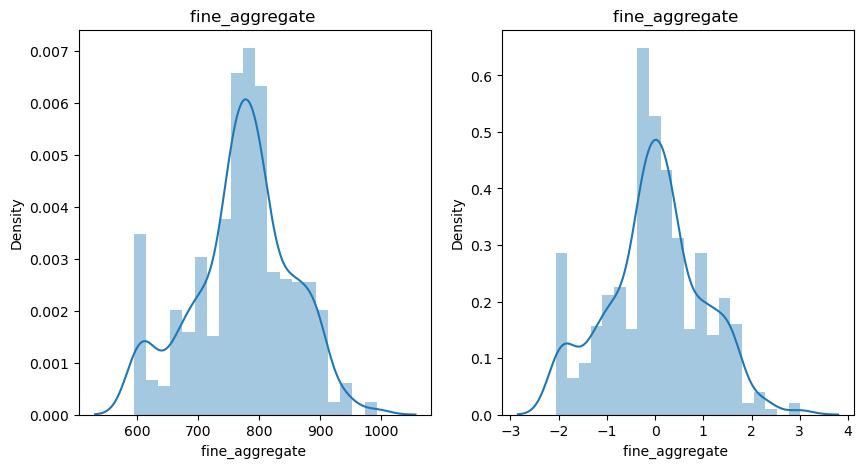

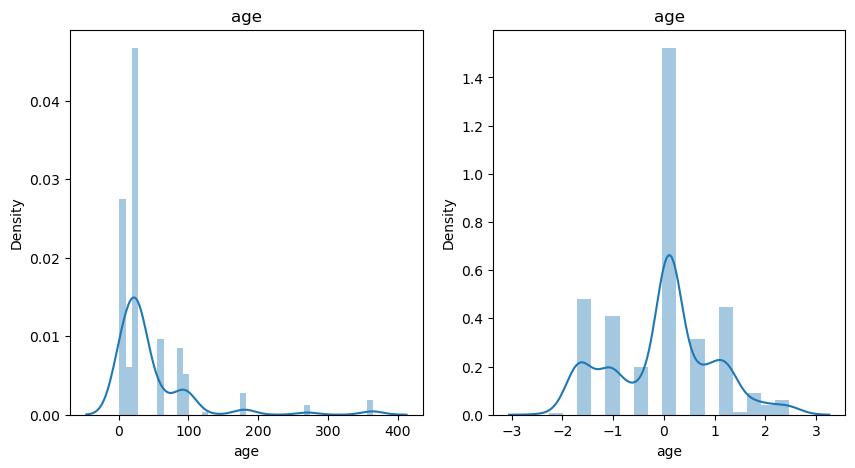

In [19]:
x_train_transformed_3=pd.DataFrame(x_train_transformed_3,columns=x_train.columns)
for col in x_train_transformed_3.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x_train_transformed_3[col])
    plt.title(col)
    plt.show()

In [24]:
pd.DataFrame({'cols':x_train.columns,'Yea_Johnson_lambdas':pt.lambdas_,'Box_Fox_columns':pt3.lambdas_})

,cols,Yea_Johnson_lambdas,Box_Fox_columns
0,cement,0.174348,0.174348
1,blast_furnace_slag,0.015715,0.015715
2,fly_ash,-0.161447,-0.161447
3,water,0.771307,0.771307
4,superplasticizer,0.253935,0.253935
5,coarse_aggregate,1.130050,1.130050
6,fine_aggregate,1.783100,1.783100
7,age,0.019885,0.019885
